# Solution of the test task


To find the number of stars and collaborators, I used the jq command. It needs to be downloaded.

In [61]:
!apt-get install -y jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
jq is already the newest version (1.5+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


For searching the statistics I searched for data on https://api.github.com using the curl command and the jq command to identify the number of objects.\
The script runs through the file `repositories.txt` and for each repository puts the data in `x.txt` and `y.txt`.\

*Restrictions do not allow processing many repositories. Only processed points are included in the graph.*

In [63]:
%%bash

readarray -t repositories <repositories.txt

for repository in ${repositories[@]}; do
  curl -s "https://api.github.com/repos/$repository?page=$i&per_page=100" | jq .stargazers_count >> x.txt
  curl -s "https://api.github.com/repos/$repository/contributors" | jq length >> y.txt
done

Adding data to the plot.

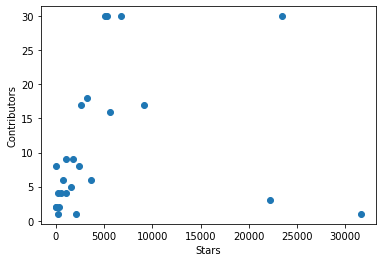

In [65]:
from matplotlib import pyplot as plt

x = []
with open('x.txt') as x_file:
    for line in x_file:
        if line == "null\n":
          break
        x.append(int(line))
y = []
with open('y.txt') as y_file:
    for line in y_file:
        if len(y) == len(x):
          break
        y.append(int(line))
 
plt.scatter(x, y)

plt.xlabel('Stars')
plt.ylabel('Contributors')

plt.show()